In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing important Libraries



In [ ]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")

## Loading the train data

In [ ]:
start = time.time()
train_data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/AI/exoTrain (1).csv")

# Conversion of labels from [1,2] to [0,1]
# 0 is label of negative points ie. points which don't any exoplanet
# 1 is label of positive points ie. points which have atleast one exoplanet

train_data["LABEL"] = train_data.LABEL.map({1:0,2:1})
end = time.time()

print("Train Data\n","-"*50,"\nTime taken for loading :",
         np.round(end - start,2),"seconds\n",
          "-"*50,"\nShape of Training data :",train_data.shape,"\n","-"*50)
end = time.time()
train_data.head()

Train Data
 -------------------------------------------------- 
Time taken for loading : 5.49 seconds
 -------------------------------------------------- 
Shape of Training data : (5087, 3198) 
 --------------------------------------------------


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,-207.47,-154.88,-173.71,-146.56,-120.26,-102.85,-98.71,-48.42,-86.57,-0.84,-25.85,-67.39,-36.55,-87.01,-97.72,-131.59,-134.80,-186.97,-244.32,-225.76,-229.60,-253.48,-145.74,-145.74,30.47,-173.39,-187.56,-192.88,-182.76,...,-167.69,-56.86,7.56,37.40,-81.13,-20.10,-30.34,-320.48,-320.48,-287.72,-351.25,-70.07,-194.34,-106.47,-14.80,63.13,130.03,76.43,131.90,-193.16,-193.16,-89.26,-17.56,-17.31,125.62,68.87,100.01,-9.60,-25.39,-16.51,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,-86.51,-74.97,-73.15,-86.13,-76.57,-61.27,-37.23,-48.53,-30.96,-8.14,-5.54,15.79,45.71,10.61,40.66,16.70,15.18,11.98,-203.70,19.13,19.13,19.13,19.13,19.13,17.02,-8.50,-13.87,-29.10,-34.29,...,-36.75,-15.49,-13.24,20.46,-1.47,-0.40,27.80,-58.20,-58.20,-72.04,-58.01,-30.92,-13.42,-13.98,-5.43,8.71,1.80,36.59,-9.80,-19.53,-19.53,-24.32,-23.88,-33.07,-9.03,3.75,11.61,-12.66,-5.69,12.53,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,469.66,462.30,492.23,441.20,483.17,481.28,535.31,554.34,562.80,540.14,576.34,551.67,556.69,550.86,577.33,562.08,577.97,530.67,553.27,538.33,527.17,532.50,273.66,273.66,292.39,298.44,252.64,233.58,171.41,...,-51.09,-33.30,-61.53,-89.61,-69.17,-86.47,-140.91,-84.20,-84.20,-89.09,-55.44,-61.05,-29.17,-63.80,-57.61,2.70,-31.25,-47.09,-6.53,14.00,14.00,-25.05,-34.98,-32.08,-17.06,-27.77,7.86,-70.77,-64.44,-83.83,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,311.14,326.19,313.11,313.89,317.96,330.92,341.10,360.58,370.29,369.71,339.00,336.24,319.31,321.56,308.02,296.82,279.34,275.78,289.67,281.33,285.37,281.87,88.75,88.75,67.71,74.46,69.34,76.51,80.26,...,-2.75,14.29,-14.18,-25.14,-13.43,-14.74,2.24,-31.07,-31.07,-50.27,-39.22,-51.33,-18.53,-1.99,10.43,-1.97,-15.32,-23.38,-27.71,-36.12,-36.12,-15.65,6.63,10.66,-8.57,-8.29,-21.90,-25.80,-29.86,7.42,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,-933.30,-889.49,-888.66,-853.95,-800.91,-754.48,-717.24,-649.34,-605.71,-575.62,-526.37,-490.12,-458.73,-447.76,-419.54,-410.76,-404.10,-425.38,-397.29,-412.73,-446.49,-413.46,-1006.21,-1006.21,-973.29,-986.01,-975.88,-982.20,-953.73,...,-694.76,-705.01,-625.24,-604.16,-668.26,-742.18,-820.55,-874.76,-874.76,-853.68,-808.62,-777.88,-712.62,-694.01,-655.74,-599.74,-617.30,-602.98,-539.29,-672.71,-672.71,-594.49,-597.60,-560.77,-501.95,-461.62,-468.59,-513.24,-504.70,-521.95,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


# Loading the test data

In [ ]:
test_data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/AI/exoTest.csv")
# Converting labels from [1,2] to [0,1] just like we did in train_data
test_data["LABEL"] = test_data.LABEL.map({1:0,2:1})
print("Test data \n","-"*50,"\nShape of Test data :",test_data.shape,"\n","-"*50)
test_data.head()

Test data 
 -------------------------------------------------- 
Shape of Test data : (570, 3198) 
 --------------------------------------------------


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,-21.97,-23.17,-29.26,-33.99,-6.25,-28.12,-27.24,-32.28,-12.29,-16.57,-23.86,-5.69,9.24,35.52,81.20,116.49,133.99,148.97,174.15,187.77,215.30,246.80,-56.68,-56.68,-56.68,-52.05,-31.52,-31.15,-48.53,-38.93,...,-2.55,12.26,-7.06,-23.53,2.54,30.21,38.87,-22.86,-22.86,-4.37,2.27,-16.27,-30.84,-7.21,-4.27,13.60,15.62,31.96,49.89,86.93,86.93,42.99,48.76,22.82,32.79,30.76,14.55,10.92,22.68,5.91,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,1,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,5458.80,5329.39,5191.38,5031.39,4769.89,4419.66,4218.92,3924.73,3605.30,3326.55,3021.20,2800.61,2474.48,2258.33,1951.69,1749.86,1585.38,1575.48,1568.41,1661.08,1977.33,2425.62,2889.61,3847.64,3847.64,3741.20,3453.47,3202.61,2923.73,2694.84,...,-3470.75,-4510.72,-5013.41,-3636.05,-2324.27,-2688.55,-2813.66,-586.22,-586.22,-756.80,-1090.23,-1388.61,-1745.36,-2015.28,-2359.06,-2516.66,-2699.31,-2777.55,-2732.97,1167.39,1167.39,1368.89,1434.80,1360.75,1148.44,1117.67,714.86,419.02,57.06,-175.66,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,1,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,150.46,85.49,-20.12,-35.88,-65.59,-15.12,16.60,-25.70,61.88,53.18,64.32,72.38,100.35,67.26,14.71,-16.41,-147.46,-231.27,-320.29,-407.82,-450.48,-146.99,-146.99,-146.99,-146.99,-166.30,-139.90,-96.41,-23.49,13.59,...,-35.24,-70.13,-35.30,-56.48,-74.60,-115.18,-8.91,-37.59,-37.59,-37.43,-104.23,-101.45,-107.35,-109.82,-126.27,-170.32,-117.85,-32.30,-70.18,314.29,314.29,314.29,149.71,54.60,12.60,-133.68,-78.16,-52.30,-8.55,-19.73,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,1,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,-679.56,-706.03,-720.56,-631.12,-659.16,-672.03,-665.06,-667.94,-660.84,-672.75,-644.91,-680.53,-620.50,-570.34,-530.00,-537.88,-578.38,-532.34,-532.38,-491.03,-485.03,-427.19,-380.84,-329.50,-286.91,-283.81,-298.19,-271.03,-268.50,-209.56,...,16.50,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-14.94,64.09,8.38,45.31,100.72,91.53,46.69,20.34,30.94,-36.81,-33.28,-69.62,-208.00,-280.28,-340.41,-337.41,-268.03,-245.00,-230.62,-129.59,-35.47,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,1,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,14.62,-19.52,-11.43,-49.80,25.84,11.62,3.18,-9.59,14.49,8.82,32.32,-28.90,-28.90,-14.09,-30.87,-18.99,-38.60,-27.79,9.65,29.60,7.88,42.87,27.59,27.05,20.26,29.48,9.71,22.84,25.99,-667.55,...,-122.12,-32.01,-47.15,-56.45,-41.71,-34.13,-43.12,-53.63,-53.63,-53.63,-24.29,22.29,25.18,1.84,-22.29,-26.43,-12.12,-33.05,-21.66,-228.32,-228.32,-228.32,-187.35,-166.23,-115.54,-50.18,-37.96,-22.37,-4.74,-35.82,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


## Basic Info

In [ ]:
# some info about train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [ ]:
#distributions of class labels

num_of_class_0_points_train = train_data.LABEL.value_counts()[0]
num_of_class_1_points_train = train_data.LABEL.value_counts()[1]
print("Out of all ",len(train_data),"points in training data, there are - \n",
          num_of_class_0_points_train,"points with class label 1, which is ",
             np.round(num_of_class_0_points_train*100/len(train_data),2),"% of the whole data and\n",
          num_of_class_1_points_train,"points with class label 2, which is ",
             np.round(num_of_class_1_points_train*100/len(train_data),2),"% of the whole data.")
print("-"*75)
num_of_class_0_points_test = test_data.LABEL.value_counts()[0]
num_of_class_1_points_test = test_data.LABEL.value_counts()[1]
print("Out of all ",len(test_data),"points in the test data, there are - \n",
          num_of_class_0_points_test,"points with class label 1, which is ",
             np.round(num_of_class_0_points_test*100/len(test_data),2),"% of the whole data and\n",
          num_of_class_1_points_test,"points with class label 2, which is ",
             np.round(num_of_class_1_points_test*100/len(test_data),2),"% of the whole data.")

Out of all  5087 points in training data, there are - 
 5050 points with class label 1, which is  99.27 % of the whole data and
 37 points with class label 2, which is  0.73 % of the whole data.
---------------------------------------------------------------------------
Out of all  570 points in the test data, there are - 
 565 points with class label 1, which is  99.12 % of the whole data and
 5 points with class label 2, which is  0.88 % of the whole data.


# Ploting distributions of labels in both the train and test datasets :

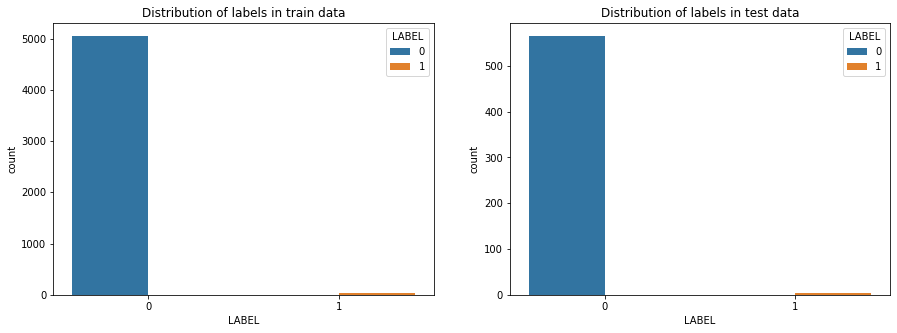

In [ ]:
# plotting the distributions of class label in both datasets

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
ax = sns.countplot(data = train_data , x = "LABEL" , hue ="LABEL")
ax = plt.title("Distribution of labels in train data")
ax2 = f.add_subplot(122)
ax2 = sns.countplot(data = test_data , x = "LABEL" , hue ="LABEL")
ax2 = plt.title("Distribution of labels in test data")

Plotting some points from negative class :

In [ ]:
#dataframes which have only possitive and negative points
negative_points = train_data[train_data["LABEL"] == 0]
positive_points = train_data[train_data["LABEL"] == 1]

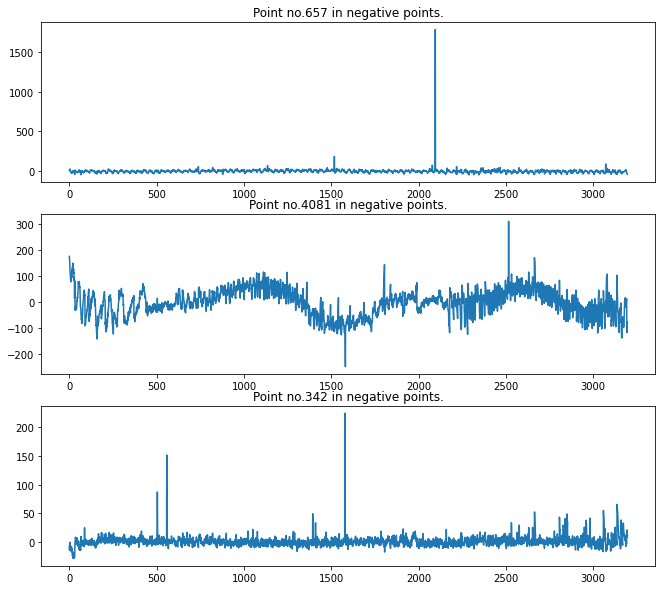

In [ ]:
# Plotting any 3 random negative label points 

indexes_of_negative_points = np.random.choice(len(negative_points), 3) #any three random points

f = plt.figure(figsize=(11,10))

ax = f.add_subplot(311)
point = negative_points.iloc[indexes_of_negative_points[0]][1:]
ax = plt.plot(list(range(len(point))),point)
plt.title("Point no."+str(indexes_of_negative_points[0])+" in negative points.")
# 
ax2 = f.add_subplot(312)
point = negative_points.iloc[indexes_of_negative_points[1]][1:]
ax2 = plt.plot(list(range(len(point))),point)
plt.title("\n"+"Point no."+str(indexes_of_negative_points[1])+" in negative points.")
#
ax = f.add_subplot(313)
point = negative_points.iloc[indexes_of_negative_points[2]][1:]
ax3 = plt.plot(list(range(len(point))),point)
ax3 = plt.title("\n"+"Point no."+str(indexes_of_negative_points[2])+" in negative points.")

Plotting points from positive class :

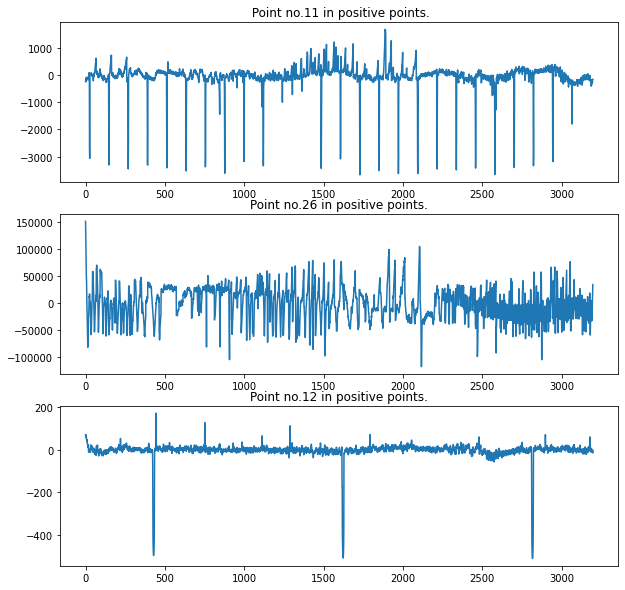

In [ ]:
# Choosing index of 3 random positive points for plot
indexes_of_positive_points = np.random.choice(len(positive_points), 3) 

f = plt.figure(figsize=(10,10))
ax = f.add_subplot(311)
point = positive_points.iloc[indexes_of_positive_points[0]][1:]
ax = plt.plot(list(range(len(point))),point)
plt.title(" Point no."+str(indexes_of_positive_points[0])+" in positive points.")
# 
ax2 = f.add_subplot(312)
point = positive_points.iloc[indexes_of_positive_points[1]][1:]
ax2 = plt.plot(list(range(len(point))),point)
plt.title("\n\n\n"+"\nPoint no."+str(indexes_of_positive_points[1])+" in positive points.")
#

ax = f.add_subplot(313)
point = positive_points.iloc[indexes_of_positive_points[2]][1:]
ax3 = plt.plot(list(range(len(point))),point)
ax3 = plt.title("\n\n\n"+"\nPoint no."+str(indexes_of_positive_points[2])+" in positive points.")

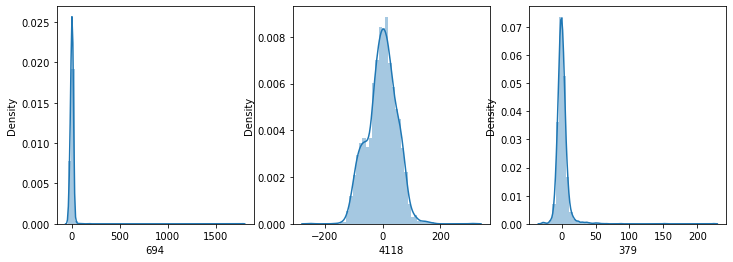

In [ ]:
f = plt.figure(figsize=(12,4))
ax = f.add_subplot(131)
point = negative_points.iloc[indexes_of_negative_points[0]][1:]
ax = sns.distplot(point)
 
ax2 = f.add_subplot(132)
point = negative_points.iloc[indexes_of_negative_points[1]][1:]
ax2 = sns.distplot(point)

ax = f.add_subplot(133)
point = negative_points.iloc[indexes_of_negative_points[2]][1:]
ax3 = sns.distplot(point)

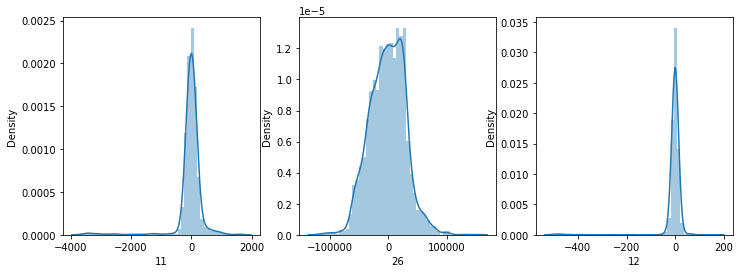

In [ ]:
f = plt.figure(figsize=(12,4))
ax = f.add_subplot(131)
point = positive_points.iloc[indexes_of_positive_points[0]][1:]
ax = sns.distplot(point)

ax2 = f.add_subplot(132)
point = positive_points.iloc[indexes_of_positive_points[1]][1:]
ax2 = sns.distplot(point)

ax = f.add_subplot(133)
point = positive_points.iloc[indexes_of_positive_points[2]][1:]
ax3 = sns.distplot(point)

## OUTLIER REMOVAL

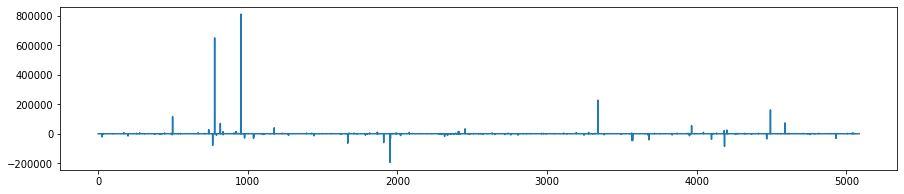

In [ ]:
sample_column = np.array(train_data["FLUX.2876"])
plt.figure(figsize=(15,3))
ax = plt.plot(list(range(len(sample_column))),sample_column)

Values of percentiles :

In [ ]:
print("0th Percentile : ",np.percentile(sample_column,0))
print("1st Percentile :",np.percentile(sample_column,1))
print("-"*50)
print("99th Percentile :",np.percentile(sample_column,99))
print("100th Percentile :",np.percentile(sample_column,100))
print("-"*50)
print("The median is :",np.median(sample_column))

0th Percentile :  -194562.0
1st Percentile : -3599.969800000001
--------------------------------------------------
99th Percentile : 3011.273200000004
100th Percentile : 812101.12
--------------------------------------------------
The median is : 2.42000000001281


In [ ]:
#Storing labels in a separate dataframe
k1 = pd.DataFrame()
k1['LABEL'] = train_data['LABEL']

In [ ]:
k1

,LABEL
0,1
1,1
2,1
3,1
4,1
...,...
5082,0
5083,0
5084,0
5085,0


In [ ]:
train_data.drop(['LABEL'], axis = 'columns', inplace = True)

In [ ]:
# Removal of outliers from the train data and creating new df

start = time.time()

outlier_removed_train_data = pd.DataFrame()
outlier_history_dict = dict()
for column_name in train_data.columns:
    column = np.array(train_data[column_name])
    percentile_1th = np.percentile(column,1)
    percentile_99th = np.percentile(column,99)
    median = np.median(column)
    new_column = []
    for value in column:
        new_value = value
        if value < percentile_1th:
            new_value = median
        if value > percentile_99th:
            new_value = median
        new_column.append(new_value)
    column_dict = dict()
    column_dict["percentile_1th"] = percentile_1th
    column_dict["percentile_99th"] = percentile_99th
    column_dict["median"] = median
    outlier_history_dict[column_name] = column_dict
    outlier_removed_train_data[column_name] = new_column
    
end = time.time()
np.save('outlier_history_dict.npy', outlier_history_dict)
print("Saved Outlier-dict in disk for future use")

Saved Outlier-dict in disk for future use


In [ ]:
print("Shape of train data with removed outliers :",outlier_removed_train_data.shape)
outlier_removed_train_data

Shape of train data with removed outliers : (5087, 3197)


,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,-207.47,-154.88,-173.71,-146.56,-120.26,-102.85,-98.71,-48.42,-86.57,-0.84,-25.85,-67.39,-36.55,-87.01,-97.72,-131.59,-134.80,-186.97,-244.32,-225.76,-229.60,-253.48,-145.74,-145.74,30.47,-173.39,-187.56,-192.88,-182.76,-195.99,...,-167.69,-56.86,7.56,37.40,-81.13,-20.10,-30.34,-320.48,-320.48,-287.72,-351.25,-70.07,-194.34,-106.47,-14.80,63.13,130.03,76.43,131.90,-193.16,-193.16,-89.26,-17.56,-17.31,125.62,68.87,100.01,-9.60,-25.39,-16.51,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,-86.51,-74.97,-73.15,-86.13,-76.57,-61.27,-37.23,-48.53,-30.96,-8.14,-5.54,15.79,45.71,10.61,40.66,16.70,15.18,11.98,-203.70,19.13,19.13,19.13,19.13,19.13,17.02,-8.50,-13.87,-29.10,-34.29,-24.68,...,-36.75,-15.49,-13.24,20.46,-1.47,-0.40,27.80,-58.20,-58.20,-72.04,-58.01,-30.92,-13.42,-13.98,-5.43,8.71,1.80,36.59,-9.80,-19.53,-19.53,-24.32,-23.88,-33.07,-9.03,3.75,11.61,-12.66,-5.69,12.53,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,469.66,462.30,492.23,441.20,483.17,481.28,535.31,554.34,562.80,540.14,576.34,551.67,556.69,550.86,577.33,562.08,577.97,530.67,553.27,538.33,527.17,532.50,273.66,273.66,292.39,298.44,252.64,233.58,171.41,224.02,...,-51.09,-33.30,-61.53,-89.61,-69.17,-86.47,-140.91,-84.20,-84.20,-89.09,-55.44,-61.05,-29.17,-63.80,-57.61,2.70,-31.25,-47.09,-6.53,14.00,14.00,-25.05,-34.98,-32.08,-17.06,-27.77,7.86,-70.77,-64.44,-83.83,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,311.14,326.19,313.11,313.89,317.96,330.92,341.10,360.58,370.29,369.71,339.00,336.24,319.31,321.56,308.02,296.82,279.34,275.78,289.67,281.33,285.37,281.87,88.75,88.75,67.71,74.46,69.34,76.51,80.26,70.31,...,-2.75,14.29,-14.18,-25.14,-13.43,-14.74,2.24,-31.07,-31.07,-50.27,-39.22,-51.33,-18.53,-1.99,10.43,-1.97,-15.32,-23.38,-27.71,-36.12,-36.12,-15.65,6.63,10.66,-8.57,-8.29,-21.90,-25.80,-29.86,7.42,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,-933.30,-889.49,-888.66,-853.95,-800.91,-754.48,-717.24,-649.34,-605.71,-575.62,-526.37,-490.12,-458.73,-447.76,-419.54,-410.76,-404.10,-425.38,-397.29,-412.73,-446.49,-413.46,-1006.21,-1006.21,-973.29,-986.01,-975.88,-982.20,-953.73,-964.35,...,-694.76,-705.01,-625.24,-604.16,-668.26,-742.18,-820.55,-874.76,-874.76,-853.68,-808.62,-777.88,-712.62,-694.01,-655.74,-599.74,-617.30,-602.98,-539.29,-672.71,-672.71,-594.49,-597.60,-560.77,-501.95,-461.62,-468.59,-513.24,-504.70,-521.95,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,-11.88,-4.85,3.88,16.85,26.54,36.7

Plotting a random flux value from the train data with removed outliers

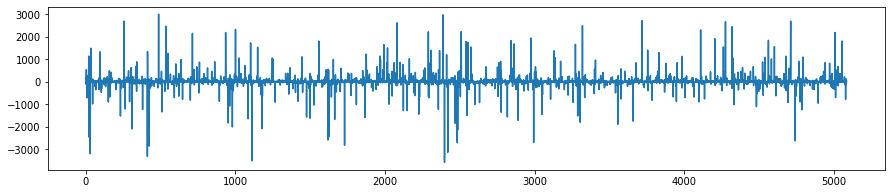

In [ ]:
outlier_removed_column = np.array(outlier_removed_train_data["FLUX.2876"])
plt.figure(figsize=(15,3))
ax = plt.plot(list(range(len(outlier_removed_column))),outlier_removed_column)

In [ ]:
print("0th Percentile is :",np.percentile(outlier_removed_column,0))
print("1st Percentile is :",np.percentile(outlier_removed_column,1))
print("-"*70)
print("99th Percentile is :",np.percentile(outlier_removed_column,99))
print("100th Percentile is :",np.percentile(outlier_removed_column,100))
print("-"*70)
print("median is :",np.median(outlier_removed_column))

0th Percentile is : -3590.44
1st Percentile is : -1004.6560000000001
----------------------------------------------------------------------
99th Percentile is : 1096.629199999977
100th Percentile is : 3002.75
----------------------------------------------------------------------
median is : 2.42000000001281


Removing outliers form test data and creating new test *data* frame:

In [ ]:
k2 = pd.DataFrame()
k2['LABEL'] = test_data['LABEL']

In [ ]:
k2

,LABEL
0,1
1,1
2,1
3,1
4,1
...,...
565,0
566,0
567,0
568,0


In [ ]:
test_data.drop(['LABEL'], axis = 'columns', inplace = True)

In [ ]:
outlier_history_dict = np.load('outlier_history_dict.npy',allow_pickle='TRUE').item()
#outlier_history_dict = np.load('outlier_history_dict.npy',allow_pickle='TRUE').item()
outlier_removed_test_data = pd.DataFrame()
for column_name in test_data.columns:
    column = np.array(test_data[column_name])
    percentile_1th = outlier_history_dict[column_name]["percentile_1th"]
    percentile_99th = outlier_history_dict[column_name]["percentile_99th"]
    median = outlier_history_dict[column_name]["median"]
    new_column = []
    for value in column:
        new_value = value
        if value < percentile_1th:
            new_value = median
        if value > percentile_99th:
            new_value = median
        new_column.append(new_value)
    outlier_removed_test_data[column_name] = new_column

In [ ]:
print("shape of test data with removed outliers :",outlier_removed_test_data.shape)
outlier_removed_test_data.head()

shape of test data with removed outliers : (570, 3197)


,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,-21.97,-23.17,-29.26,-33.99,-6.25,-28.12,-27.24,-32.28,-12.29,-16.57,-23.86,-5.69,9.24,35.52,81.20,116.49,133.99,148.97,174.15,187.77,215.30,246.80,-56.68,-56.68,-56.68,-52.05,-31.52,-31.15,-48.53,-38.93,-26.06,...,-2.55,12.26,-7.06,-23.53,2.54,30.21,38.87,-22.86,-22.86,-4.37,2.27,-16.27,-30.84,-7.21,-4.27,13.60,15.62,31.96,49.89,86.93,86.93,42.99,48.76,22.82,32.79,30.76,14.55,10.92,22.68,5.91,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,-0.71,-0.89,-0.74,-0.40,-0.61,-1.03,-0.87,-0.66,-0.56,-0.96,-1.31,-0.91,-0.77,-1.44,-0.07,-0.10,0.52,1.00,0.90,3021.20,2800.61,2474.48,2258.33,1951.69,1749.86,1585.38,1575.48,1568.41,1661.08,1977.33,2425.62,2889.61,0.24,0.24,-0.30,-0.18,-0.68,2923.73,2694.84,2474.22,...,-3470.75,3.46,3.17,-1.38,-2324.27,-2688.55,-2813.66,-586.22,-586.22,-756.80,-1090.23,-1388.61,-1745.36,-2015.28,-2359.06,-2516.66,-2699.31,-2777.55,-2732.97,1167.39,1167.39,1368.89,1434.80,1360.75,1148.44,1117.67,714.86,419.02,57.06,-175.66,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,150.46,85.49,-20.12,-35.88,-65.59,-15.12,16.60,-25.70,61.88,53.18,64.32,72.38,100.35,67.26,14.71,-16.41,-147.46,-231.27,-320.29,-407.82,-450.48,-146.99,-146.99,-146.99,-146.99,-166.30,-139.90,-96.41,-23.49,13.59,67.59,...,-35.24,-70.13,-35.30,-56.48,-74.60,-115.18,-8.91,-37.59,-37.59,-37.43,-104.23,-101.45,-107.35,-109.82,-126.27,-170.32,-117.85,-32.30,-70.18,314.29,314.29,314.29,149.71,54.60,12.60,-133.68,-78.16,-52.30,-8.55,-19.73,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,-679.56,-706.03,-720.56,-631.12,-659.16,-672.03,-665.06,-667.94,-660.84,-672.75,-644.91,-680.53,-620.50,-570.34,-530.00,-537.88,-578.38,-532.34,-532.38,-491.03,-485.03,-427.19,-380.84,-329.50,-286.91,-283.81,-298.19,-271.03,-268.50,-209.56,-180.44,...,16.50,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-14.94,64.09,8.38,45.31,100.72,91.53,46.69,20.34,30.94,-36.81,-33.28,-69.62,-208.00,-280.28,-340.41,-337.41,-268.03,-245.00,-230.62,-129.59,-35.47,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,14.62,-19.52,-11.43,-49.80,25.84,11.62,3.18,-9.59,14.49,8.82,32.32,-28.90,-28.90,-14.09,-30.87,-18.99,-38.60,-27.79,9.65,29.60,7.88,42.87,27.59,27.05,20.26,29.48,9.71,22.84,25.99,-667.55,-1336.24,...,-122.12,-32.01,-47.15,-56.45,-41.71,-34.13,-43.12,-53.63,-53.63,-53.63,-24.29,22.29,25.18,1.84,-22.29,-26.43,-12.12,-33.05,-21.66,-228.32,-228.32,-228.32,-187.35,-166.23,-115.54,-50.18,-37.96,-22.37,-4.74,-35.82,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


## MIN-MAX SCALING OF DATA:

In [ ]:
#Scaling each feature in (0,1) range and creating new df

scalled_train_data = pd.DataFrame()
scalling_history_dict = dict()
for feature_name in outlier_removed_train_data.columns:
    feature = outlier_removed_train_data[feature_name]
    normalized_feature = []
    min_feature = min(feature)
    max_feature = max(feature)
    for feature_value in feature:
        normalized_value = ((feature_value - min_feature) / float(max_feature - min_feature))
        normalized_feature.append(normalized_value)
    scalled_train_data[feature_name] = normalized_feature
    dict_of_this_feature = dict()
    dict_of_this_feature["min_feature"] = min_feature
    dict_of_this_feature["max_feature"] = max_feature
    scalling_history_dict[feature_name] = dict_of_this_feature

np.save('scalling_history_dict.npy', scalling_history_dict)

In [ ]:
print("shape of train data after min max scaling :",scalled_train_data.shape)
scalled_train_data.head()

shape of train data after min max scaling : (5087, 3197)


,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.554745,0.602764,0.524654,0.511858,0.487822,0.439388,0.469687,0.465073,0.526355,0.507944,0.489669,0.444354,0.421255,0.449337,0.454451,0.472464,0.462607,0.533487,0.491506,0.502267,0.441483,0.483432,0.475368,0.513677,0.523854,0.478732,0.439027,0.463340,0.405176,0.411695,0.426675,0.424883,0.476409,0.513310,0.561668,0.490990,0.455414,0.426005,0.397965,0.405898,...,0.490210,0.554334,0.520635,0.494739,0.455531,0.536205,0.542236,0.482562,0.487365,0.511030,0.472877,0.486282,0.418409,0.487711,0.586187,0.620397,0.627479,0.614162,0.611068,0.578344,0.540400,0.534877,0.552302,0.558096,0.570849,0.576281,0.571294,0.530334,0.557199,0.594587,0.544171,0.581155,0.485918,0.557922,0.596574,0.615022,0.590597,0.610348,0.564506,0.567276
1,0.535415,0.584061,0.513189,0.509895,0.481856,0.446937,0.477446,0.466708,0.525717,0.522151,0.509031,0.457077,0.435887,0.459131,0.461412,0.479377,0.471992,0.533471,0.500237,0.501216,0.444670,0.495006,0.487177,0.527541,0.541674,0.496825,0.458389,0.488160,0.410308,0.441874,0.457358,0.458588,0.504443,0.540110,0.559253,0.520682,0.487497,0.454718,0.427191,0.439649,...,0.508121,0.559622,0.517526,0.491884,0.468898,0.539597,0.553140,0.531764,0.532912,0.548062,0.519124,0.492160,0.444524,0.502729,0.587824,0.611232,0.603702,0.606973,0.586553,0.607485,0.570375,0.545213,0.551357,0.555548,0.550024,0.566408,0.557769,0.529867,0.560165,0.598909,0.555341,0.591895,0.496235,0.551292,0.589162,0.603125,0.581820,0.601009,0.566321,0.576673
2,0.618647,0.674644,0.596622,0.590299,0.562266,0.525303,0.565363,0.552128,0.607175,0.613460,0.598060,0.542619,0.518155,0.544597,0.550592,0.569584,0.559389,0.620051,0.593465,0.580147,0.535971,0.569567,0.560530,0.604269,0.610782,0.563365,0.531044,0.552869,0.505954,0.505858,0.520030,0.522060,0.547723,0.581483,0.608710,0.575952,0.536724,0.500770,0.467684,0.488647,...,0.506159,0.557346,0.510307,0.473338,0.457538,0.524774,0.521498,0.526887,0.528397,0.545134,0.519529,0.487636,0.442251,0.494639,0.578707,0.610219,0.597574,0.591873,0.587119,0.613113,0.576163,0.545096,0.549696,0.555708,0.548782,0.561629,0.557196,0.521008,0.551319,0.584568,0.545124,0.598884,0.502949,0.550629,0.586939,0.603683,0.581803,0.594999,0.552025,0.558249
3,0.588629,0.644670,0.565804,0.560535,0.541448,0.503006,0.542680,0.525970,0.587749,0.587094,0.572685,0.520948,0.492092,0.523963,0.524270,0.544585,0.529744,0.592224,0.563239,0.555612,0.498731,0.539592,0.526453,0.571703,0.576102,0.531002,0.492492,0.521070,0.472648,0.474187,0.490202,0.491073,0.516281,0.551426,0.568357,0.535620,0.502867,0.473233,0.449741,0.458363,...,0.512771,0.563429,0.517385,0.484201,0.466891,0.537128,0.548346,0.536854,0.537623,0.551800,0.522087,0.489095,0.443787,0.504675,0.590594,0.609433,0.600527,0.596151,0.583455,0.604701,0.567511,0.546593,0.555921,0.562619,0.550095,0.564583,0.552642,0.527864,0.556526,0.598149,0.556683,0.596268,0.500436,0.558574,0.592614,0.601385,0.582324,0.596970,0.560779,0.575733
4,0.379833,0.412554,0.358587,0.351934,0.335036,0.307069,0.331976,0.326654,0.383998,0.375228,0.373482,0.327392,0.317223,0.334688,0.346007,0.364122,0.368190,0.447187,0.409994,0.419521,0.362948,0.424615,0.414763,0.462442,0.482412,0.444671,0.404260,0.433597,0.385848,0.388654,0.399920,0.405104,0.330095,0.373442,0.381388,0.344664,0.309803,0.287624,0.246198,0.254518,...,0.418117,0.471

In [ ]:
scalling_history_dict = np.load('scalling_history_dict.npy',allow_pickle='TRUE').item()

#Scaling each feature in test data in (0,1) range and creating new df

scalled_test_data = pd.DataFrame()
for feature_name in outlier_removed_test_data.columns:
    feature = outlier_removed_test_data[feature_name]
    normalized_feature = []
    min_feature = scalling_history_dict[feature_name]["min_feature"]
    max_feature = scalling_history_dict[feature_name]["max_feature"]
    for feature_value in feature:
        normalized_value = ((feature_value - min_feature) / (max_feature - min_feature))
        normalized_feature.append(normalized_value)
    scalled_test_data[feature_name] = normalized_feature

print("Shape of test data after min max scaling :",scalled_test_data.shape)
scalled_test_data.head()

Shape of test data after min max scaling : (570, 3197)


,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.558536,0.605372,0.534329,0.523186,0.500681,0.463255,0.494217,0.480500,0.539895,0.530567,0.519170,0.464355,0.441585,0.472077,0.469131,0.485035,0.472748,0.538676,0.502497,0.498953,0.444646,0.494094,0.485714,0.537566,0.551439,0.511135,0.475661,0.508391,0.459772,0.466049,0.485444,0.449215,0.491552,0.527787,0.546847,0.516537,0.484305,0.451311,0.426278,0.439377,...,0.512799,0.563169,0.518449,0.484472,0.469570,0.544869,0.555216,0.538394,0.539049,0.559681,0.528630,0.494360,0.442010,0.503828,0.588026,0.612055,0.606264,0.606137,0.596880,0.625353,0.588754,0.555926,0.562224,0.564585,0.556492,0.570503,0.558219,0.533462,0.564436,0.597924,0.557999,0.599802,0.503116,0.554376,0.591685,0.608925,0.589326,0.605991,0.608440,0.582645
1,0.540974,0.589298,0.521615,0.515838,0.493668,0.457377,0.491116,0.479358,0.538770,0.534007,0.522670,0.468868,0.446419,0.472857,0.473600,0.489548,0.477755,0.540584,0.505240,0.937324,0.884976,0.837102,0.804805,0.803219,0.761773,0.688216,0.659822,0.682332,0.645930,0.683193,0.754221,0.813488,0.501231,0.537039,0.556142,0.522180,0.489933,0.972395,0.964425,0.931974,...,0.038410,0.562044,0.519979,0.488204,0.079144,0.076639,0.020207,0.432711,0.441217,0.430490,0.356334,0.288305,0.194522,0.177779,0.176627,0.185895,0.102853,0.099159,0.115432,0.806696,0.775279,0.766952,0.769587,0.780928,0.729044,0.735299,0.665365,0.595677,0.569612,0.570901,0.468924,0.445735,0.319416,0.342450,0.336723,0.335850,0.193993,0.197838,0.182267,0.252009
2,0.664061,0.719409,0.633995,0.616964,0.584640,0.530168,0.561577,0.533685,0.571294,0.558795,0.536564,0.465810,0.441310,0.462460,0.471202,0.492324,0.473752,0.549327,0.513448,0.511648,0.456896,0.506771,0.490271,0.528123,0.534325,0.476796,0.426572,0.446707,0.384517,0.384002,0.436866,0.438049,0.476196,0.513107,0.526327,0.497021,0.472251,0.455701,0.436617,0.457828,...,0.508327,0.552638,0.514228,0.478920,0.456627,0.519830,0.546255,0.535631,0.536491,0.554004,0.511834,0.481570,0.430966,0.487167,0.566712,0.581078,0.581516,0.594542,0.576107,0.663513,0.628004,0.599105,0.577327,0.569724,0.553369,0.545571,0.544035,0.523824,0.559734,0.594108,0.558492,0.588908,0.493863,0.546639,0.578446,0.580402,0.567449,0.572268,0.557548,0.578364
3,0.420786,0.457909,0.398364,0.390723,0.381870,0.343399,0.365020,0.367922,0.427822,0.422918,0.409862,0.354288,0.354697,0.366258,0.366540,0.378989,0.375715,0.445536,0.399467,0.409546,0.338759,0.406474,0.398741,0.450762,0.467173,0.424220,0.387705,0.420248,0.374003,0.379744,0.402301,0.409137,0.445162,0.490363,0.505222,0.468518,0.439997,0.412747,0.392689,0.408962,...,0.515404,0.397142,0.327172,0.271647,0.253261,0.318087,0.306618,0.301326,0.319592,0.557866,0.538380,0.498061,0.453002,0.521352,0.604763,0.617628,0.607140,0.605953,0.581881,0.605177,0.561727,0.515979,0.512997,0.505851,0.499234,0.525201,0.518509,0.496639,0.541510,0.591765,0.574102,0.611125,0.514709,0.563712,0.591197,0.605717,0.587316,0.579383,0.520857,0.539486
4,0.535315,0.586915,0.520388,0.514944,0.491339,0.454028,0.491111,0.472704,0.538069,0.536557,0.519755,0.467193,0.439285,0.477278,0.475462,0.490093,0.476211,0.542521,0.506483,0.507041,0.441004,0.488788,0.478593,0.521650,0.533992,0.490078,0.452841,0.487869,0.439787,0.440488,0.460287,0.459634,0.505790,0.540293,0.561491,0.523961,0.494278,0.464376,0.302533,0.181250,...,0.496444,0.557

Dimensionality reduction of train dataset using T-distributed Stochastic Neighbor Embedding (TSNE)

Shape of training data after dimensionality reduction : (5087, 2)


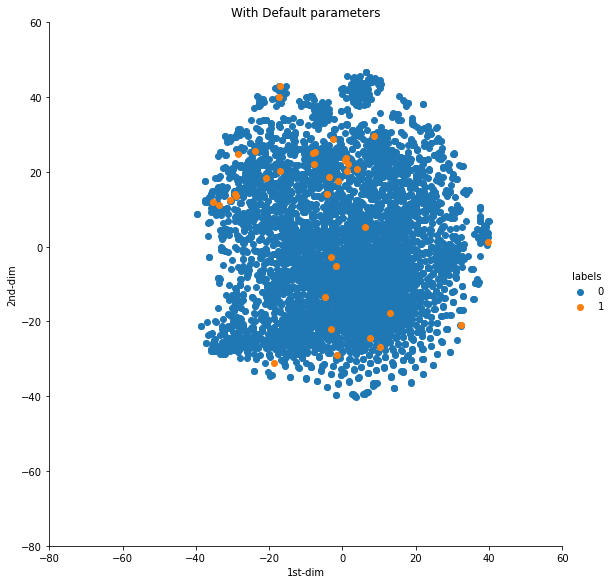

In [ ]:
import sklearn
from sklearn.manifold import TSNE

model = TSNE(n_components = 2 , random_state = 0 ,n_jobs = -1)
dataset_with_2_dimensions = model.fit_transform(scalled_train_data)
print("Shape of training data after dimensionality reduction :",dataset_with_2_dimensions.shape)

dataset_with_2_dimensions = pd.DataFrame(data = dataset_with_2_dimensions , columns = ("1st-dim" , '2nd-dim'))
labels = k1
dataset_with_2_dimensions['labels'] = labels
sns.FacetGrid(dataset_with_2_dimensions , hue = "labels" , size = 8 )\
   .map(plt.scatter , '1st-dim' , "2nd-dim")\
   .add_legend()
plt.title("With Default parameters")
plt.xlim([-80, 60])
plt.ylim([-80, 60])
plt.show()

## USING IMBALANCED DATA

Just showing some models here to show how this is affecting their accuracy

kNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

hyperparameter_dict = dict(n_neighbors = list(range(1,25,3)), weights = ["uniform", "distance"])

knn = GridSearchCV(estimator = classifier,param_grid = hyperparameter_dict,
                                         scoring = "f1",n_jobs = -1,cv = 5)
knn.fit(scalled_train_data,k1) 

knn.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors =  1, weights = 'uniform')
best_knn.fit(scalled_train_data,k1)

KNeighborsClassifier(n_neighbors=1)

Train Accuracy_score is : 1.0 
 ----------------------------------------
Train Recall_score_ is : 1.0 
 ----------------------------------------
Train f1_Score is : 1.0 
 ----------------------------------------


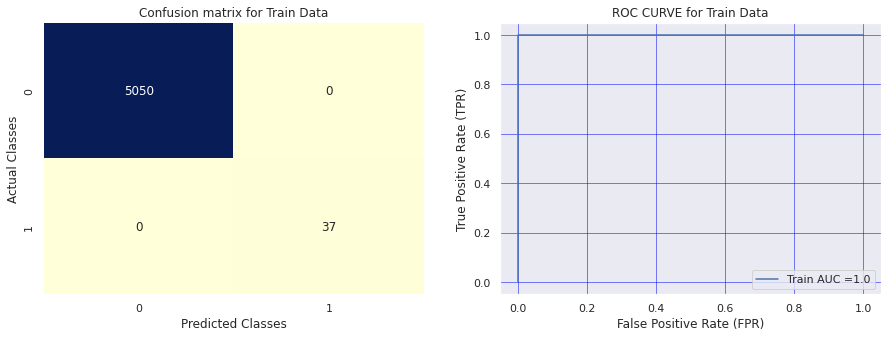

In [ ]:
from sklearn.metrics import confusion_matrix ,accuracy_score 
from sklearn.metrics import f1_score , roc_curve , auc , recall_score


predicted_train_labels = best_knn.predict(scalled_train_data)
accuracy_score_ = accuracy_score(k1,predicted_train_labels)
print("Train Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(k1,predicted_train_labels)
print("Train Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(k1,predicted_train_labels)
print("Train f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))

plt.subplot(121)
conf_mat = confusion_matrix(k1,predicted_train_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Confusion matrix for Train Data")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)
train_fpr , train_tpr , thresolds = roc_curve(k1,predicted_train_labels)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC CURVE for Train Data")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Test_Accuracy_score is : 0.991 
 ----------------------------------------
Test Recall_score_ is : 0.0 
 ----------------------------------------
Test_f1_Score is : 0.0 
 ----------------------------------------


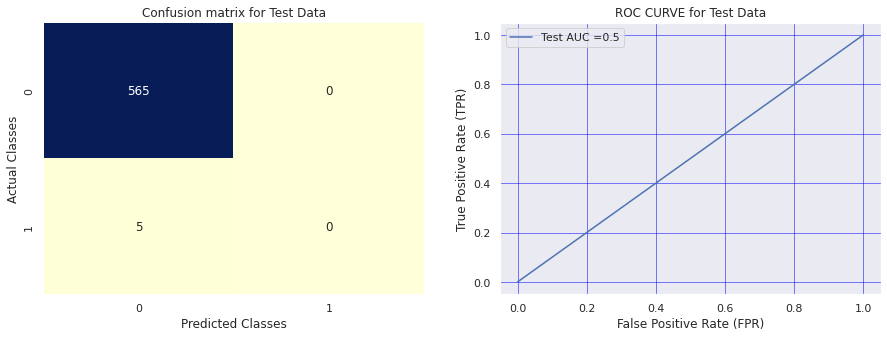

In [ ]:
predicted_test_labels = best_knn.predict(scalled_test_data)
accuracy_score_ = accuracy_score(k2,predicted_test_labels)
print("Test_Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(k2,predicted_test_labels)
print("Test Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(k2,predicted_test_labels)
print("Test_f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))
plt.subplot(121)

conf_mat = confusion_matrix(k2,predicted_test_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Confusion matrix for Test Data")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)

test_fpr , test_tpr , thresolds = roc_curve(k2,predicted_test_labels)
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC CURVE for Test Data")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
hyperparameter_dict = {"penalty":["l1","l2"],"C":[0.0001,0.001,0.01,0.1,1,10,100,1000],
                "class_weight":[None,"balanced"]}

logistic_regression = GridSearchCV(estimator = classifier,param_grid = hyperparameter_dict,
                                         scoring = "f1",n_jobs = -1,cv = 5)

logistic_regression.fit(scalled_train_data,k1)
logistic_regression.best_params_

{'C': 10, 'class_weight': None, 'penalty': 'l2'}

In [ ]:
best_logistic_regression = LogisticRegression(C= 10, class_weight= None, penalty= 'l2')
best_logistic_regression.fit(scalled_train_data,k1)

LogisticRegression(C=10)

Train Accuracy_score is : 0.996 
 ----------------------------------------
Train f1_Score is : 0.577 
 ----------------------------------------


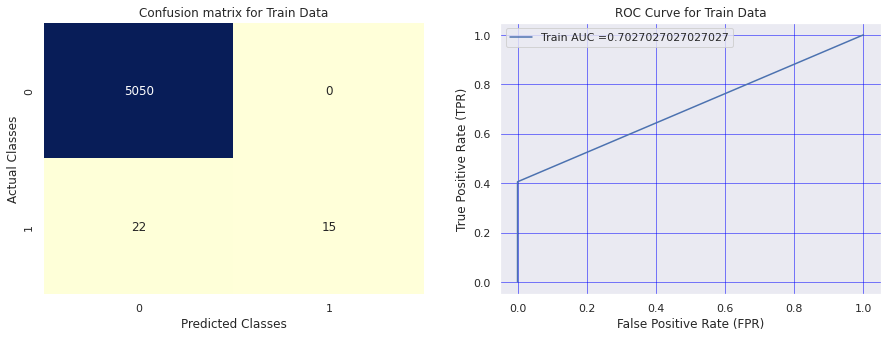

In [ ]:
predicted_train_labels = best_logistic_regression.predict(scalled_train_data)
accuracy_score_ = accuracy_score(k1,predicted_train_labels)
print("Train Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
f1_score_ = f1_score(k1,predicted_train_labels)
print("Train f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))

plt.subplot(121)
conf_mat = confusion_matrix(k1,predicted_train_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Confusion matrix for Train Data")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)
train_fpr , train_tpr , thresolds = roc_curve(k1,predicted_train_labels)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Train Data")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Test_Accuracy_score is : 0.991 
 ----------------------------------------
Test Recall_score_ is : 0.0 
 ----------------------------------------
Test_f1_Score is : 0.0 
 ----------------------------------------


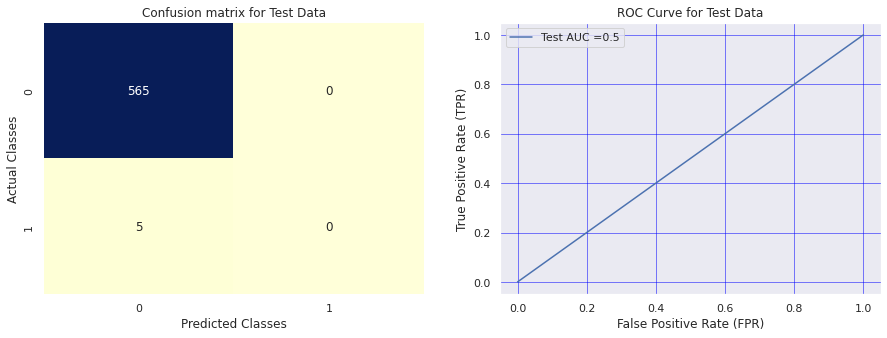

In [ ]:
predicted_test_labels = best_logistic_regression.predict(scalled_test_data)
accuracy_score_ = accuracy_score(k2,predicted_test_labels)
print("Test_Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(k2,predicted_test_labels)
print("Test Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(k2,predicted_test_labels)
print("Test_f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))
plt.subplot(121)

conf_mat = confusion_matrix(k2,predicted_test_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Confusion matrix for Test Data")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)

test_fpr , test_tpr , thresolds = roc_curve(k2,predicted_test_labels)
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Test Data")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
hyperparameter_dict = {"max_depth":[5,10,20,50,100,500]}

decison_tree = GridSearchCV(estimator = classifier,param_grid = hyperparameter_dict,
                                         scoring = "f1",n_jobs = -1,cv = 5)

decison_tree.fit(scalled_train_data,k1)
decison_tree.best_params_

{'max_depth': 100}

In [ ]:
best_decision_tree = DecisionTreeClassifier(max_depth=100)
best_decision_tree.fit(scalled_train_data,k1)

DecisionTreeClassifier(max_depth=100)

Train Accuracy_score is : 1.0 
 ----------------------------------------
Train Recall_score_ is : 1.0 
 ----------------------------------------
Train f1_Score is : 1.0 
 ----------------------------------------


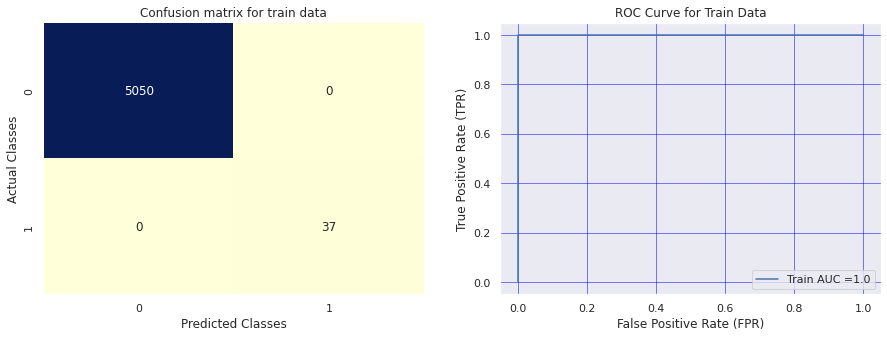

In [ ]:
predicted_train_labels = best_decision_tree.predict(scalled_train_data)
accuracy_score_ = accuracy_score(k1,predicted_train_labels)
print("Train Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(k1,predicted_train_labels)
print("Train Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(k1,predicted_train_labels)
print("Train f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))

plt.subplot(121)
conf_mat = confusion_matrix(k1,predicted_train_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Confusion matrix for train data")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)
train_fpr , train_tpr , thresolds = roc_curve(k1,predicted_train_labels)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Train Data")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Test_Accuracy_score is : 0.988 
 ----------------------------------------
Test Recall_score_ is : 0.2 
 ----------------------------------------
Test_f1_Score is : 0.222 
 ----------------------------------------


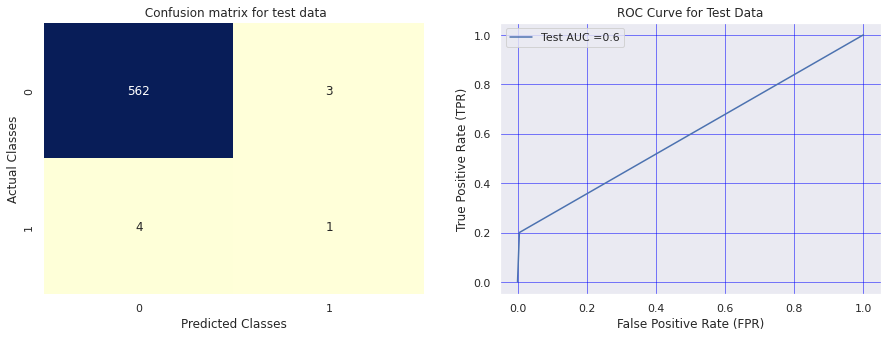

In [ ]:
predicted_test_labels = best_decision_tree.predict(scalled_test_data)
accuracy_score_ = accuracy_score(k2,predicted_test_labels)
print("Test_Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(k2,predicted_test_labels)
print("Test Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(k2,predicted_test_labels)
print("Test_f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))
plt.subplot(121)

conf_mat = confusion_matrix(k2,predicted_test_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title(" Confusion matrix for test data")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)

test_fpr , test_tpr , thresolds = roc_curve(k2,predicted_test_labels)
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(np.round(auc(test_fpr, test_tpr),2)))
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Test Data")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

## Oversampling And Making Data Balanced :

In [ ]:
# scalled_train_data = pd.read_csv("scalled_train_data.csv")
labeles_of_train_data = k1["LABEL"]
# scalled_train_data = scalled_train_data.drop("LABEL" , axis = 1)

negative_points_before_oversampling = labeles_of_train_data.value_counts()[0]
positive_points_before_oversampling = labeles_of_train_data.value_counts()[1]

print("points with negative class before oversampling :",negative_points_before_oversampling)
print("points with positive class before oversampling :",positive_points_before_oversampling)

points with negative class before oversampling : 5050
points with positive class before oversampling : 37


Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
start = time.time()
smenn = SMOTE(random_state = 33,n_jobs = -1,k_neighbors = 4)
train_data_oversampled , labels_oversampled = smenn.fit_resample(scalled_train_data,list(labeles_of_train_data))
end = time.time()

In [ ]:
print('Shape of oversampled train data :',train_data_oversampled.shape)
train_data_oversampled.head()

Shape of oversampled train data : (10100, 3197)


,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.554745,0.602764,0.524654,0.511858,0.487822,0.439388,0.469687,0.465073,0.526355,0.507944,0.489669,0.444354,0.421255,0.449337,0.454451,0.472464,0.462607,0.533487,0.491506,0.502267,0.441483,0.483432,0.475368,0.513677,0.523854,0.478732,0.439027,0.463340,0.405176,0.411695,0.426675,0.424883,0.476409,0.513310,0.561668,0.490990,0.455414,0.426005,0.397965,0.405898,...,0.490210,0.554334,0.520635,0.494739,0.455531,0.536205,0.542236,0.482562,0.487365,0.511030,0.472877,0.486282,0.418409,0.487711,0.586187,0.620397,0.627479,0.614162,0.611068,0.578344,0.540400,0.534877,0.552302,0.558096,0.570849,0.576281,0.571294,0.530334,0.557199,0.594587,0.544171,0.581155,0.485918,0.557922,0.596574,0.615022,0.590597,0.610348,0.564506,0.567276
1,0.535415,0.584061,0.513189,0.509895,0.481856,0.446937,0.477446,0.466708,0.525717,0.522151,0.509031,0.457077,0.435887,0.459131,0.461412,0.479377,0.471992,0.533471,0.500237,0.501216,0.444670,0.495006,0.487177,0.527541,0.541674,0.496825,0.458389,0.488160,0.410308,0.441874,0.457358,0.458588,0.504443,0.540110,0.559253,0.520682,0.487497,0.454718,0.427191,0.439649,...,0.508121,0.559622,0.517526,0.491884,0.468898,0.539597,0.553140,0.531764,0.532912,0.548062,0.519124,0.492160,0.444524,0.502729,0.587824,0.611232,0.603702,0.606973,0.586553,0.607485,0.570375,0.545213,0.551357,0.555548,0.550024,0.566408,0.557769,0.529867,0.560165,0.598909,0.555341,0.591895,0.496235,0.551292,0.589162,0.603125,0.581820,0.601009,0.566321,0.576673
2,0.618647,0.674644,0.596622,0.590299,0.562266,0.525303,0.565363,0.552128,0.607175,0.613460,0.598060,0.542619,0.518155,0.544597,0.550592,0.569584,0.559389,0.620051,0.593465,0.580147,0.535971,0.569567,0.560530,0.604269,0.610782,0.563365,0.531044,0.552869,0.505954,0.505858,0.520030,0.522060,0.547723,0.581483,0.608710,0.575952,0.536724,0.500770,0.467684,0.488647,...,0.506159,0.557346,0.510307,0.473338,0.457538,0.524774,0.521498,0.526887,0.528397,0.545134,0.519529,0.487636,0.442251,0.494639,0.578707,0.610219,0.597574,0.591873,0.587119,0.613113,0.576163,0.545096,0.549696,0.555708,0.548782,0.561629,0.557196,0.521008,0.551319,0.584568,0.545124,0.598884,0.502949,0.550629,0.586939,0.603683,0.581803,0.594999,0.552025,0.558249
3,0.588629,0.644670,0.565804,0.560535,0.541448,0.503006,0.542680,0.525970,0.587749,0.587094,0.572685,0.520948,0.492092,0.523963,0.524270,0.544585,0.529744,0.592224,0.563239,0.555612,0.498731,0.539592,0.526453,0.571703,0.576102,0.531002,0.492492,0.521070,0.472648,0.474187,0.490202,0.491073,0.516281,0.551426,0.568357,0.535620,0.502867,0.473233,0.449741,0.458363,...,0.512771,0.563429,0.517385,0.484201,0.466891,0.537128,0.548346,0.536854,0.537623,0.551800,0.522087,0.489095,0.443787,0.504675,0.590594,0.609433,0.600527,0.596151,0.583455,0.604701,0.567511,0.546593,0.555921,0.562619,0.550095,0.564583,0.552642,0.527864,0.556526,0.598149,0.556683,0.596268,0.500436,0.558574,0.592614,0.601385,0.582324,0.596970,0.560779,0.575733
4,0.379833,0.412554,0.358587,0.351934,0.335036,0.307069,0.331976,0.326654,0.383998,0.375228,0.373482,0.327392,0.317223,0.334688,0.346007,0.364122,0.368190,0.447187,0.409994,0.419521,0.362948,0.424615,0.414763,0.462442,0.482412,0.444671,0.404260,0.433597,0.385848,0.388654,0.399920,0.405104,0.330095,0.373442,0.381388,0.344664,0.309803,0.287624,0.246198,0.254518,...,0.418117,0.471

Checking the number of Points we have in Both classes After Oversampling :

In [ ]:
negative_points_after_oversampling = pd.Series(labels_oversampled).value_counts()[0]
positive_points_after_oversampling = pd.Series(labels_oversampled).value_counts()[1]
print("points belonging to negative class after oversampling :",negative_points_after_oversampling)
print("points belonging to positive class after oversampling :",positive_points_after_oversampling)
print("Total number of points in the balanced dataset :",train_data_oversampled.shape[0])

points belonging to negative class after oversampling : 5050
points belonging to positive class after oversampling : 5050
Total number of points in the balanced dataset : 10100


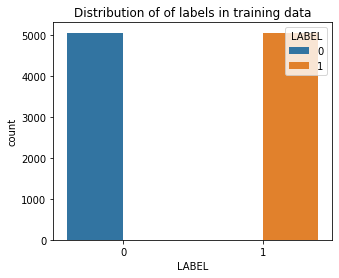

In [ ]:
train_data_oversampled["LABEL"] = list(labels_oversampled)

f = plt.figure(figsize=(5,4))
ax = sns.countplot(data = train_data_oversampled , x = "LABEL" , hue ="LABEL")
ax = plt.title("Distribution of of labels in training data")

In [ ]:
train_data_oversampled['LABEL'] 

0        1
1        1
2        1
3        1
4        1
        ..
10095    1
10096    1
10097    1
10098    1
10099    1
Name: LABEL, Length: 10100, dtype: int64

Now the Data is balanced

## Modeling with Balanced Data :

In [ ]:
k3 = pd.DataFrame()
k3['Label'] = train_data_oversampled['LABEL']
k3

,Label
0,1
1,1
2,1
3,1
4,1
...,...
10095,1
10096,1
10097,1
10098,1


In [ ]:
train_data_oversampled.drop(['LABEL'], axis = 'columns', inplace = True)

knn

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

hyperparameter_dict = dict(n_neighbors = list(range(1,25,3)), weights = ["uniform", "distance"])

knn = GridSearchCV(estimator = classifier,param_grid = hyperparameter_dict,
                                         scoring = "f1",n_jobs = -1,cv = 5)
knn.fit(train_data_oversampled,k3) 
knn.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors =  1, weights = 'uniform')
best_knn.fit(train_data_oversampled,k3)

KNeighborsClassifier(n_neighbors=1)

Train Accuracy_score is : 1.0 
 ----------------------------------------
Train Recall_score_ is : 1.0 
 ----------------------------------------
Train f1_Score is : 1.0 
 ----------------------------------------


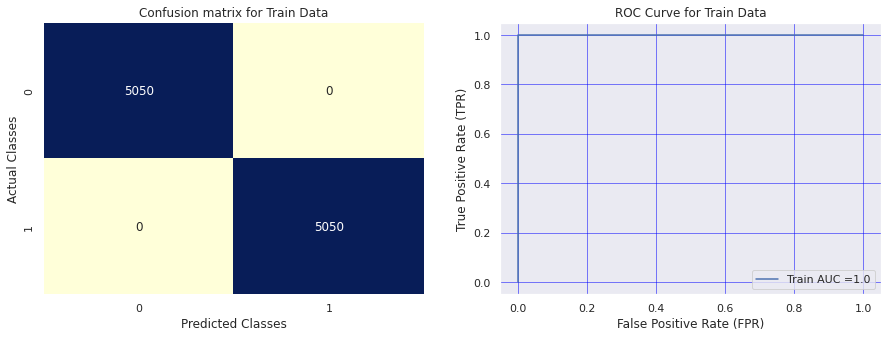

In [ ]:
from sklearn.metrics import confusion_matrix ,accuracy_score 
from sklearn.metrics import f1_score , roc_curve , auc , recall_score


predicted_train_labels = best_knn.predict(train_data_oversampled)
accuracy_score_ = accuracy_score(k3,predicted_train_labels)
print("Train Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(k3,predicted_train_labels)
print("Train Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(k3,predicted_train_labels)
print("Train f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))

plt.subplot(121)
conf_mat = confusion_matrix(k3,predicted_train_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Confusion matrix for Train Data")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)
train_fpr , train_tpr , thresolds = roc_curve(k3,predicted_train_labels)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Train Data")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Test_Accuracy_score is : 0.993 
 ----------------------------------------
Test Recall_score_ is : 0.4 
 ----------------------------------------
Test_f1_Score is : 0.5 
 ----------------------------------------


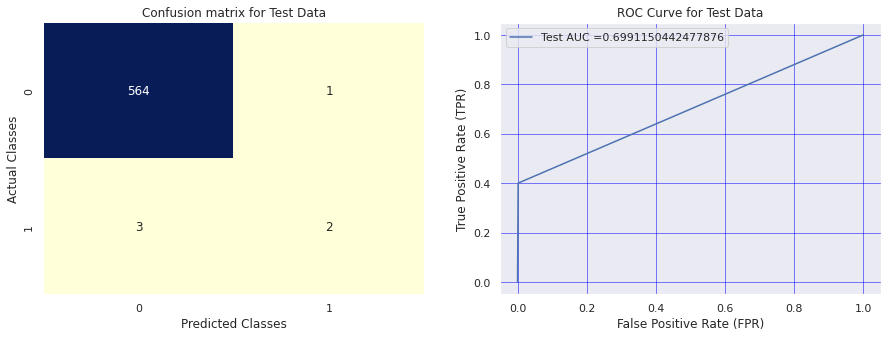

In [ ]:
predicted_test_labels = best_knn.predict(scalled_test_data)
accuracy_score_ = accuracy_score(k2,predicted_test_labels)
print("Test_Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(k2,predicted_test_labels)
print("Test Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(k2,predicted_test_labels)
print("Test_f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))
plt.subplot(121)

conf_mat = confusion_matrix(k2,predicted_test_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Confusion matrix for Test Data")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)

test_fpr , test_tpr , thresolds = roc_curve(k2,predicted_test_labels)
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Test Data")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
hyperparameter_dict = {"penalty":["l1","l2"],"C":[0.0001,0.001,100,200,300,500,1000],
                "class_weight":[None,"balanced"]}

logistic_regression = GridSearchCV(estimator = classifier,param_grid = hyperparameter_dict,
                                         scoring = "f1",n_jobs = -1,cv = 5)

logistic_regression.fit(train_data_oversampled,k3)
logistic_regression.best_params_

{'C': 100, 'class_weight': None, 'penalty': 'l2'}

In [ ]:
best_logistic_regression = LogisticRegression(C= 100, class_weight= None, penalty= 'l2')

best_logistic_regression.fit(train_data_oversampled,k3)

LogisticRegression(C=100)

Train Accuracy_score is : 0.981 
 ----------------------------------------
Train Recall_score_ is : 0.987 
 ----------------------------------------
Train f1_Score is : 0.981 
 ----------------------------------------


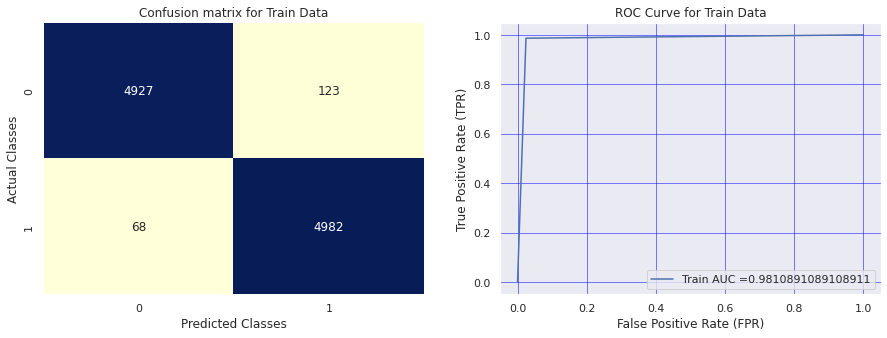

In [ ]:
from sklearn.metrics import confusion_matrix ,accuracy_score 
from sklearn.metrics import f1_score , roc_curve , auc , recall_score


predicted_train_labels = best_logistic_regression.predict(train_data_oversampled)
accuracy_score_ = accuracy_score(k3,predicted_train_labels)
print("Train Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(k3,predicted_train_labels)
print("Train Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(k3,predicted_train_labels)
print("Train f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))

plt.subplot(121)
conf_mat = confusion_matrix(k3,predicted_train_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Confusion matrix for Train Data")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)
train_fpr , train_tpr , thresolds = roc_curve(k3,predicted_train_labels)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Train Data")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Test_Accuracy_score is : 0.954 
 ----------------------------------------
Test Recall_score_ is : 0.4 
 ----------------------------------------
Test_f1_Score is : 0.133 
 ----------------------------------------


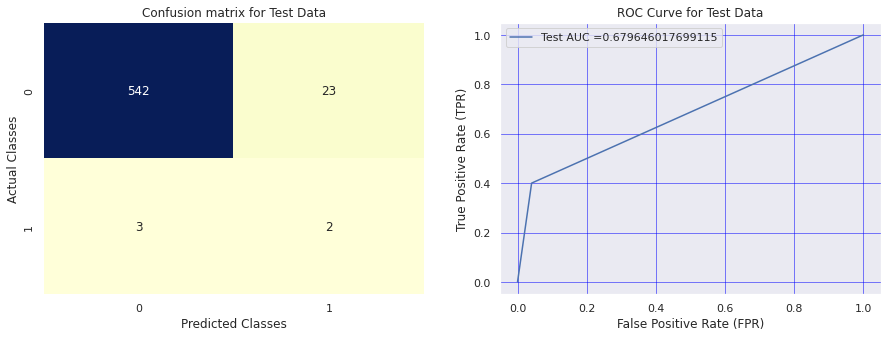

In [ ]:
predicted_test_labels = best_logistic_regression.predict(scalled_test_data)
accuracy_score_ = accuracy_score(k2,predicted_test_labels)
print("Test_Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(k2,predicted_test_labels)
print("Test Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(k2,predicted_test_labels)
print("Test_f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))
plt.subplot(121)

conf_mat = confusion_matrix(k2,predicted_test_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Confusion matrix for Test Data")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)

test_fpr , test_tpr , thresolds = roc_curve(k2,predicted_test_labels)
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Test Data")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Decision tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
hyperparameter_dict = {"max_depth":[5,10,20,50,100,500]}

decison_tree = GridSearchCV(estimator = classifier,param_grid = hyperparameter_dict,
                                         scoring = "f1",n_jobs = -1,cv = 5)

decison_tree.fit(train_data_oversampled,k3)

decison_tree.best_params_

{'max_depth': 100}

In [ ]:
best_decision_tree = DecisionTreeClassifier(max_depth=500)
best_decision_tree.fit(train_data_oversampled,k3)

DecisionTreeClassifier(max_depth=500)

Train Accuracy_score is : 1.0 
 ----------------------------------------
Train Recall_score_ is : 1.0 
 ----------------------------------------
Train f1_Score is : 1.0 
 ----------------------------------------


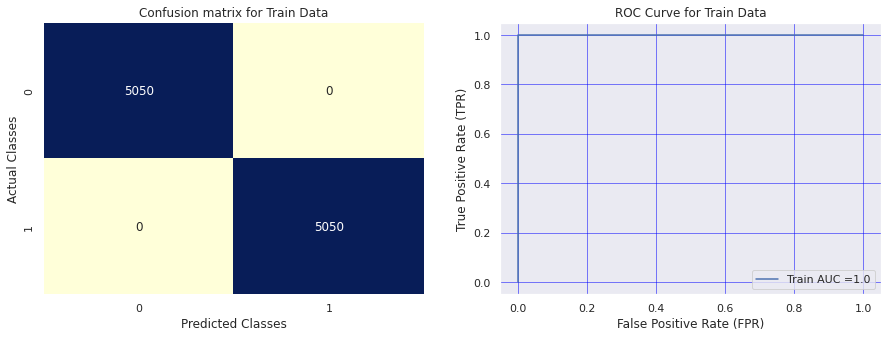

In [ ]:
from sklearn.metrics import confusion_matrix ,accuracy_score 
from sklearn.metrics import f1_score , roc_curve , auc , recall_score


predicted_train_labels = best_decision_tree.predict(train_data_oversampled)
accuracy_score_ = accuracy_score(k3,predicted_train_labels)
print("Train Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(k3,predicted_train_labels)
print("Train Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(k3,predicted_train_labels)
print("Train f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))

plt.subplot(121)
conf_mat = confusion_matrix(k3,predicted_train_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Confusion matrix for Train Data")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)
train_fpr , train_tpr , thresolds = roc_curve(k3,predicted_train_labels)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Train Data")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Test_Accuracy_score is : 0.982 
 ----------------------------------------
Test Recall_score_ is : 0.4 
 ----------------------------------------
Test_f1_Score is : 0.286 
 ----------------------------------------


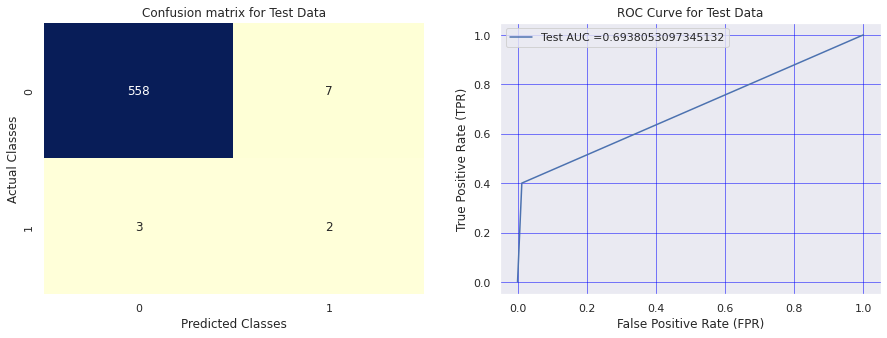

In [ ]:
predicted_test_labels = best_decision_tree.predict(scalled_test_data)
accuracy_score_ = accuracy_score(k2,predicted_test_labels)
print("Test_Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(k2,predicted_test_labels)
print("Test Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(k2,predicted_test_labels)
print("Test_f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))
plt.subplot(121)

conf_mat = confusion_matrix(k2,predicted_test_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Confusion matrix for Test Data")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)

test_fpr , test_tpr , thresolds = roc_curve(k2,predicted_test_labels)
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Test Data")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

SVM


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

#Classifier
from sklearn import svm
#classifier = svm.LinearSVC()

classifier = svm.SVC()  
print(classifier.get_params().keys())

#clf_parameters = {}
hyperparameter_dict = {'kernel':['linear']}
        
    
#Classificaion
svm = GridSearchCV(estimator = classifier,param_grid = hyperparameter_dict,
                                         scoring = "f1",cv = 5)

svm.fit(train_data_oversampled,k3) 
svm.best_params_

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])


{'kernel': 'linear'}

In [ ]:
from sklearn import svm
best_svm = svm.SVC(kernel = 'linear')
best_svm.fit(train_data_oversampled,k3)

KeyboardInterrupt: ignored

Train Accuracy_score is : 0.998 
 ----------------------------------------
Train Recall_score_ is : 1.0 
 ----------------------------------------
Train f1_Score is : 0.998 
 ----------------------------------------


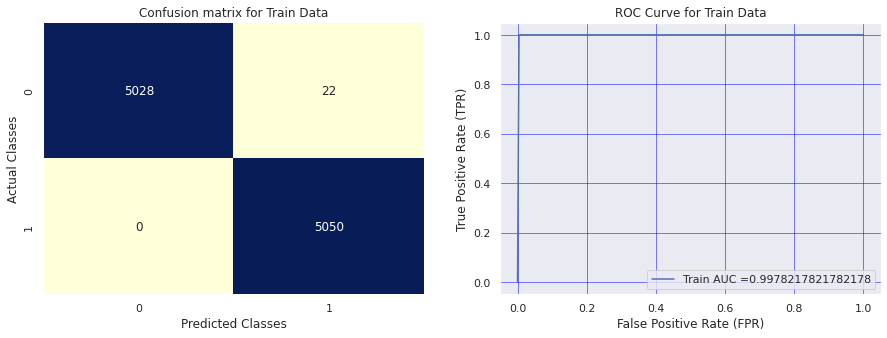

In [ ]:
from sklearn.metrics import confusion_matrix ,accuracy_score 
from sklearn.metrics import f1_score , roc_curve , auc , recall_score


predicted_train_labels = best_svm.predict(train_data_oversampled)
accuracy_score_ = accuracy_score(k3,predicted_train_labels)
print("Train Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(k3,predicted_train_labels)
print("Train Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(k3,predicted_train_labels)
print("Train f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))

plt.subplot(121)
conf_mat = confusion_matrix(k3,predicted_train_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Confusion matrix for Train Data")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)
train_fpr , train_tpr , thresolds = roc_curve(k3,predicted_train_labels)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Train Data")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Test_Accuracy_score is : 0.979 
 ----------------------------------------
Test Recall_score_ is : 0.2 
 ----------------------------------------
Test_f1_Score is : 0.143 
 ----------------------------------------


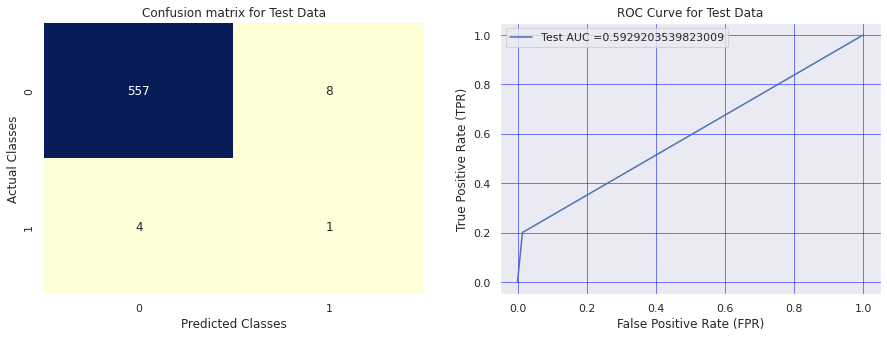

In [ ]:
predicted_test_labels = best_svm.predict(scalled_test_data)
accuracy_score_ = accuracy_score(k2,predicted_test_labels)
print("Test_Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(k2,predicted_test_labels)
print("Test Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(k2,predicted_test_labels)
print("Test_f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))
plt.subplot(121)

conf_mat = confusion_matrix(k2,predicted_test_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Confusion matrix for Test Data")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)

test_fpr , test_tpr , thresolds = roc_curve(k2,predicted_test_labels)
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Test Data")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier  

#Classifier
classifier = RandomForestClassifier() 
print(classifier.get_params().keys())

hyperparameter_dict = {'max_depth':(20,30,40)}

rf = GridSearchCV(estimator = classifier,param_grid = hyperparameter_dict,
                                         scoring = "f1",n_jobs = -1,cv = 5)

rf.fit(train_data_oversampled,k3)

rf.best_params_

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


{'max_depth': 40}

In [ ]:
best_rf = RandomForestClassifier(max_depth=40)
best_rf.fit(train_data_oversampled,k3)

RandomForestClassifier(max_depth=40)

Train Accuracy_score is : 1.0 
 ----------------------------------------
Train Recall_score_ is : 1.0 
 ----------------------------------------
Train f1_Score is : 1.0 
 ----------------------------------------


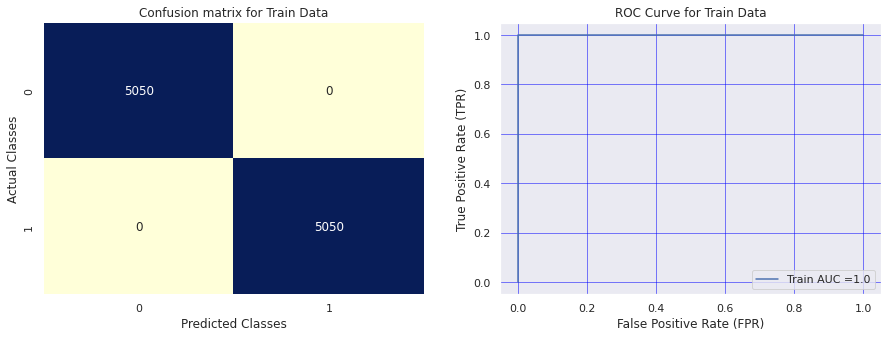

In [ ]:
from sklearn.metrics import confusion_matrix ,accuracy_score 
from sklearn.metrics import f1_score , roc_curve , auc , recall_score


predicted_train_labels = best_rf.predict(train_data_oversampled)
accuracy_score_ = accuracy_score(k3,predicted_train_labels)
print("Train Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(k3,predicted_train_labels)
print("Train Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(k3,predicted_train_labels)
print("Train f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))

plt.subplot(121)
conf_mat = confusion_matrix(k3,predicted_train_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Confusion matrix for Train Data")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)
train_fpr , train_tpr , thresolds = roc_curve(k3,predicted_train_labels)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Train Data")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Test_Accuracy_score is : 0.991 
 ----------------------------------------
Test Recall_score_ is : 0.0 
 ----------------------------------------
Test_f1_Score is : 0.0 
 ----------------------------------------


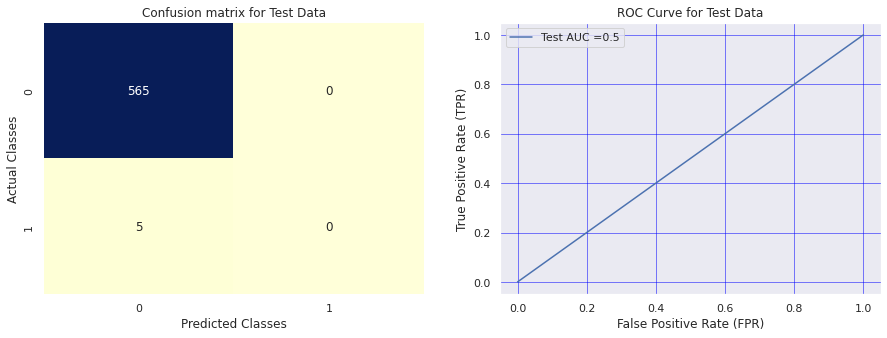

In [ ]:
predicted_test_labels = best_rf.predict(scalled_test_data)
accuracy_score_ = accuracy_score(k2,predicted_test_labels)
print("Test_Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(k2,predicted_test_labels)
print("Test Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(k2,predicted_test_labels)
print("Test_f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))
plt.subplot(121)

conf_mat = confusion_matrix(k2,predicted_test_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Confusion matrix for Test Data")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)

test_fpr , test_tpr , thresolds = roc_curve(k2,predicted_test_labels)
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Test Data")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
print(classifier.get_params().keys())

hyperparameter_dict  = {'hidden_layer_sizes':(50,60,80)}

#Classificaion
NN = GridSearchCV(estimator = classifier,param_grid = hyperparameter_dict,
                                         scoring = "f1",n_jobs = -1,cv = 5)

NN.fit(train_data_oversampled,k3)

NN.best_params_


dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])


{'hidden_layer_sizes': 50}

In [ ]:
best_NN = MLPClassifier(hidden_layer_sizes= 80)
best_NN.fit(train_data_oversampled,k3)

MLPClassifier(hidden_layer_sizes=80)

Train Accuracy_score is : 0.957 
 ----------------------------------------
Train Recall_score_ is : 1.0 
 ----------------------------------------
Train f1_Score is : 0.958 
 ----------------------------------------


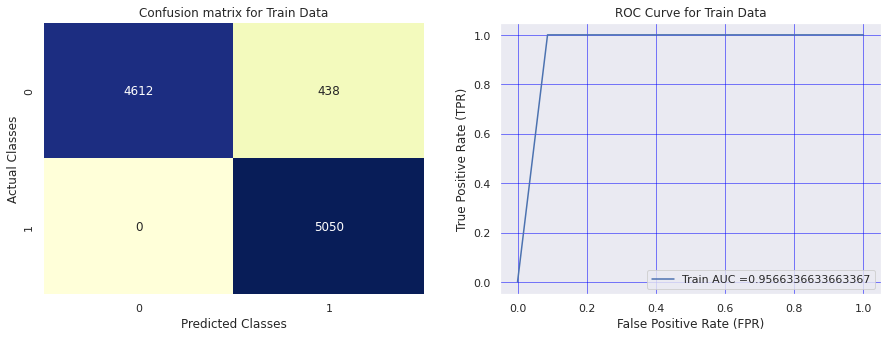

In [ ]:
from sklearn.metrics import confusion_matrix ,accuracy_score 
from sklearn.metrics import f1_score , roc_curve , auc , recall_score


predicted_train_labels = best_NN.predict(train_data_oversampled)
accuracy_score_ = accuracy_score(k3,predicted_train_labels)
print("Train Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(k3,predicted_train_labels)
print("Train Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(k3,predicted_train_labels)
print("Train f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))

plt.subplot(121)
conf_mat = confusion_matrix(k3,predicted_train_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Confusion matrix for Train Data")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)
train_fpr , train_tpr , thresolds = roc_curve(k3,predicted_train_labels)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Train Data")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Test_Accuracy_score is : 0.914 
 ----------------------------------------
Test Recall_score_ is : 0.4 
 ----------------------------------------
Test_f1_Score is : 0.075 
 ----------------------------------------


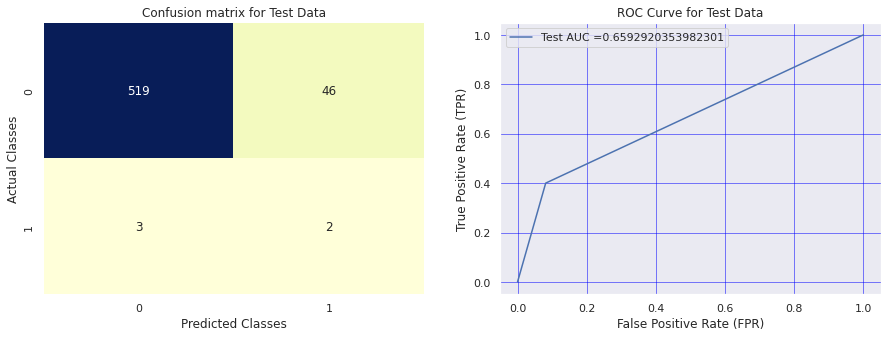

In [ ]:
predicted_test_labels = best_NN.predict(scalled_test_data)
accuracy_score_ = accuracy_score(k2,predicted_test_labels)
print("Test_Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(k2,predicted_test_labels)
print("Test Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(k2,predicted_test_labels)
print("Test_f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))
plt.subplot(121)

conf_mat = confusion_matrix(k2,predicted_test_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Confusion matrix for Test Data")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)

test_fpr , test_tpr , thresolds = roc_curve(k2,predicted_test_labels)
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Test Data")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
    
#Classifier
classifier = MultinomialNB(fit_prior=True, class_prior=None)
print(classifier.get_params().keys())

hyperparameter_dict  = {'alpha':(0,1)}
        

#Classificaion
NB = GridSearchCV(estimator = classifier,param_grid = hyperparameter_dict,
                                         scoring = "f1",n_jobs = -1,cv = 5)

NB.fit(train_data_oversampled,k3)

NB.best_params_

dict_keys(['alpha', 'class_prior', 'fit_prior'])


{'alpha': 1}

In [ ]:
best_NB = MultinomialNB(alpha=1)
best_NB.fit(train_data_oversampled,k3)

MultinomialNB(alpha=1)

Train Accuracy_score is : 0.587 
 ----------------------------------------
Train Recall_score_ is : 0.22 
 ----------------------------------------
Train f1_Score is : 0.348 
 ----------------------------------------


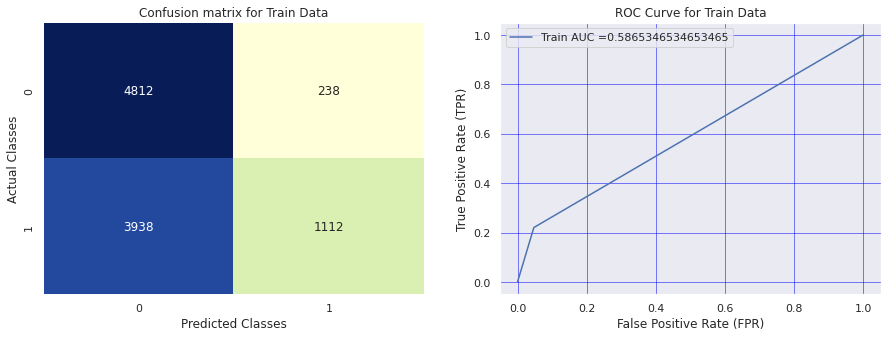

In [ ]:
from sklearn.metrics import confusion_matrix ,accuracy_score 
from sklearn.metrics import f1_score , roc_curve , auc , recall_score


predicted_train_labels = best_NB.predict(train_data_oversampled)
accuracy_score_ = accuracy_score(k3,predicted_train_labels)
print("Train Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(k3,predicted_train_labels)
print("Train Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(k3,predicted_train_labels)
print("Train f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))

plt.subplot(121)
conf_mat = confusion_matrix(k3,predicted_train_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Confusion matrix for Train Data")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)
train_fpr , train_tpr , thresolds = roc_curve(k3,predicted_train_labels)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Train Data")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Test_Accuracy_score is : 0.965 
 ----------------------------------------
Test Recall_score_ is : 0.2 
 ----------------------------------------
Test_f1_Score is : 0.091 
 ----------------------------------------


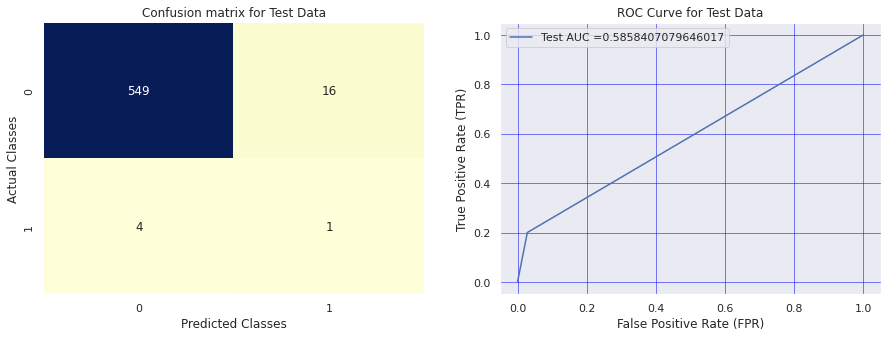

In [ ]:
predicted_test_labels = best_NB.predict(scalled_test_data)
accuracy_score_ = accuracy_score(k2,predicted_test_labels)
print("Test_Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(k2,predicted_test_labels)
print("Test Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(k2,predicted_test_labels)
print("Test_f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))
plt.subplot(121)

conf_mat = confusion_matrix(k2,predicted_test_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Confusion matrix for Test Data")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)

test_fpr , test_tpr , thresolds = roc_curve(k2,predicted_test_labels)
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Test Data")
plt.grid(color='blue', linestyle='-', linewidth=0.5)